<a href="https://colab.research.google.com/github/runomed/web/blob/master/DENEME2_ver%C4%B1_s%C4%B1lme_detay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import plotly.graph_objects as go
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')  # Kelime ayırıcı
nltk.download('wordnet')  # WordNet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
!pip install plotly
import plotly.graph_objects as go

In [3]:
df=pd.read_csv("data.csv", encoding='ISO-8859-1')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [6]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [7]:
df.shape

(541909, 8)

In [10]:
print(df["CustomerID"].max())
print(df["CustomerID"].min())

18287.0
12346.0


In [ ]:
## customerid  verisi bulunmayan bos olan yerlere essiz deger atama islemi
null_indices = df[df["CustomerID"].isnull()].index
start_value = 100000
unique_values = np.arange(start_value, start_value + len(null_indices)).tolist()
df.loc[null_indices, "CustomerID"] = unique_values
## customerid atanan essiz degerleri sonra filtreleme icin asagida yer alan islemi uygula
##df1= df[~df["CustomerID"].isin(unique_values)]

In [ ]:

df=df[~(df["InvoiceNo"].str.contains("C",na=False))] ## Df verisinde invoiceNo kolonunda  icerisinde (iade urunler) c olan verileri filtreleme yaptik.
returned_invoices = df[df['InvoiceNo'].str.contains('C', na=False)]['InvoiceNo'].str.replace('C', '') ## iade edilmis urunlerin alim fisleri kodlari listelendi
df=df[~df['InvoiceNo'].isin(returned_invoices)] ## returned_invoices atanmis faturaralar filtrelendi Boylelikle iade urunlerin alimlarinide listeden filtreleyip cikardik
df=df[df['Description'].notna() & ~df['Description'].str.startswith(('DOTCOM POSTAGE', 'Manual', 'AMAZON FEE', 'POSTAGE', 'Adjust bad debt', 'CARRIAGE'), na=False)] ## aciklama kolonu bos olan  ve hesaplarimizda yeralmamasi gereken bazi verileri kelime uzerinden filtreleme yaptim
df=df[df["Quantity"] > 0] ## alim miktari negatif veya sifir bir deger almamali
df=df[df["UnitPrice"] > 0] ## alinan bir urunun bir degeri olmali sifirdan kucujk degerleri filtreleme yaptik.


In [ ]:
## stok codu Description anlamsiz veriler filtrelendi('DOTCOM POSTAGE', 'Manual', 'AMAZON FEE', 'POSTAGE', 'Adjust bad debt', 'CARRIAGE')
##StockCode_rows = df[df["Description"] == "REGENCY CAKESTAND 3 TIER"]
##print(StockCode_rows)
##df[df["Description"] == "REGENCY CAKESTAND 3 TIER"].shape[0]

In [ ]:
df.shape

(527806, 8)

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
## Her sütundaki NaN değerlerinin sayısını görmek için
nan_per_column = df.isna().sum()
print(nan_per_column)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,527806.0,10.566667,1.0,1.0,3.0,11.0,80995.0,155.827357
InvoiceDate,527806,2011-07-04 21:26:36.440662272,2010-12-01 08:26:00,2011-03-28 12:23:00,2011-07-20 13:26:00,2011-10-19 13:38:00,2011-12-09 12:50:00,NaN
UnitPrice,527806.0,3.26681,0.001,1.25,2.08,4.13,649.5,4.381432
CustomerID,527806.0,53248.33438,12346.0,14390.0,16265.0,18283.0,235078.0,68738.581016


In [ ]:
## TotalPrice adinda miktar ve birim fiyatlarini carpimi ile toplam degerler bulundu fatura bazinda
df["TotalPrice"]=df["Quantity"]*df["UnitPrice"]

In [ ]:
df.groupby("Description").agg({"UnitPrice":"sum", "Quantity": "sum", "TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False).head(40)


,UnitPrice,Quantity,TotalPrice
Description,,,
REGENCY CAKESTAND 3 TIER,28191.46,13879,174484.74
"PAPER CRAFT , LITTLE BIRDIE",2.08,80995,168469.60
WHITE HANGING HEART T-LIGHT HOLDER,7472.97,37891,106292.77
PARTY BUNTING,9885.03,18295,99504.33
JUMBO BAG RED RETROSPOT,5249.29,48474,94340.05
MEDIUM CERAMIC TOP STORAGE JAR,367.12,78033,81700.92
RABBIT NIGHT LIGHT,2466.20,30788,66964.99
PAPER CHAIN KIT 50'S CHRISTMAS,4028.20,19355,64952.29
ASSORTED COLOUR BIRD ORNAMENT,2564.49,36461,59094.93


In [ ]:
top_products = df.groupby("Description").agg({"Quantity": "sum", "TotalPrice": "sum"}).sort_values("Quantity", ascending=False).head(20)

In [ ]:
# Grafik oluşturma
fig = go.Figure(data=[
    go.Bar(x=top_products.index,
           y=top_products['Quantity'],
           name='Toplam Miktar Quantity',
           marker_color='blue'),
    go.Bar(x=top_products.index,
           y=top_products['TotalPrice'],
           name='Toplam tutar TotalPrice',
           marker_color='orange')
])

# Grafik başlığı ve etiketleri
fig.update_layout(title='En Çok Satan 20 Ürün',
                  xaxis_title='Ürün Açıklaması',
                  yaxis_title='Değer',
                  barmode='group',  # Çubukları gruplandır
                  template='plotly_white')

# Grafiği gösterme
fig.show()

In [ ]:
top_products1 = df.groupby("Description").agg({"UnitPrice":"sum", "Quantity": "sum", "TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False).head(20)

In [ ]:
# Grafik oluşturma
fig = go.Figure(data=[
    go.Bar(x=top_products1.index,
           y=top_products1['Quantity'],
           name='Toplam Miktar Quantity',
           marker_color='blue'),
    go.Bar(x=top_products1.index,
           y=top_products1['TotalPrice'],
           name='Toplam tutar TotalPrice',
           marker_color='orange')
])

# Grafik başlığı ve etiketleri
fig.update_layout(title='En Çok Kazandiran 20 Ürün',
                  xaxis_title='en cok kazanilan 20 urun',
                  yaxis_title='Değer',
                  barmode='group',  # Çubukları gruplandır
                  template='plotly_white')

# Grafiği gösterme
fig.show()

##dotcom postage (dotcom posta ücreti) regency cakestand 3 tier(regency kek standı 3 katlı)

In [ ]:
print(df["InvoiceDate"].min())
print(df["InvoiceDate"].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [ ]:
df["Year"] = df.InvoiceDate.dt.year
df["Quarter"] = df.InvoiceDate.dt.quarter
df["Month"] = df.InvoiceDate.dt.month
df["Week"] = df.InvoiceDate.dt.isocalendar().week
df["Weekday"] = df.InvoiceDate.dt.weekday
df["Day"] = df.InvoiceDate.dt.day
df["Dayname"] = df["InvoiceDate"].dt.strftime("%A")
df["Dayofyear"] = df.InvoiceDate.dt.dayofyear
df["Date"] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [ ]:
grouped_features = ["Date", "Year", "Quarter","Month", "Week", "Weekday", "Dayofyear", "Day","Dayname",
                    "StockCode", 'CustomerID','Description','UnitPrice']

df_daily = pd.DataFrame(df.groupby(grouped_features).Quantity.sum(),
                          columns=["Quantity"])
df_daily["TotalPrice"] = df.groupby(grouped_features).TotalPrice.sum()
df_daily = df_daily.reset_index()
df_daily.head(5)

,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,Dayname,StockCode,CustomerID,Description,UnitPrice,Quantity,TotalPrice
0,2010-12-01,2010,4,12,48,2,335,1,Wednesday,10002,12583.0,INFLATABLE POLITICAL GLOBE,0.85,48,40.80
1,2010-12-01,2010,4,12,48,2,335,1,Wednesday,10002,16098.0,INFLATABLE POLITICAL GLOBE,0.85,12,10.20
2,2010-12-01,2010,4,12,48,2,335,1,Wednesday,10125,17968.0,MINI FUNKY DESIGN TAPES,0.85,2,1.70
3,2010-12-01,2010,4,12,48,2,335,1,Wednesday,10133,15983.0,COLOURING PENCILS BROWN TUBE,0.85,5,4.25
4,2010-12-01,2010,4,12,48,2,335,1,Wednesday,10135,100542.0,COLOURING PENCILS BROWN TUBE,2.51,1,2.51


In [ ]:
df_daily.loc[:, ["Quantity", "TotalPrice"]].describe()

,Quantity,TotalPrice
count,275369.000000,275369.000000
mean,20.253369,37.303934
std,217.547578,377.185508
min,1.000000,0.001000
25%,2.000000,5.100000
50%,6.000000,14.920000
75%,18.000000,31.500000
max,80995.000000,168469.600000


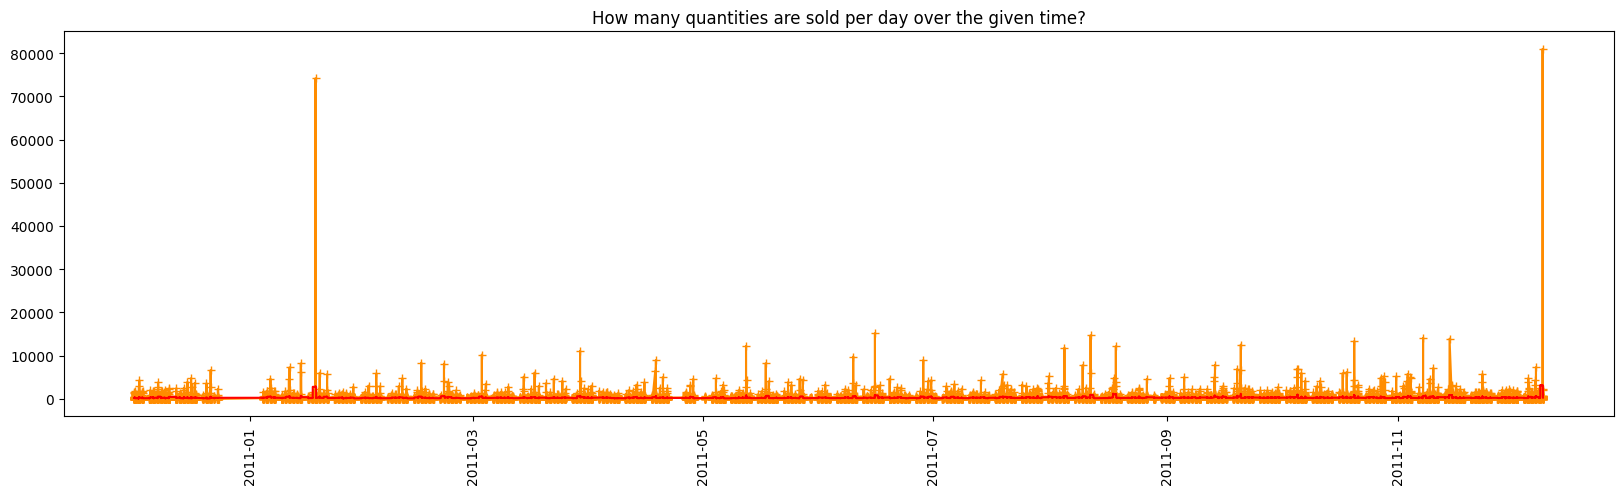

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df.groupby("InvoiceDate").Quantity.sum(), marker='+', c="darkorange")
plt.plot(df.groupby("InvoiceDate").Quantity.sum().rolling(window=30, center=True).mean(),
        c="red")
plt.xticks(rotation=90);
plt.title("How many quantities are sold per day over the given time?");

In [ ]:
## GUNLUK SATIS CIZELGESINDE 2 PIK DEGER VAR  bu degerlerin oldugu tarih araliklari ve bu tarihlerde kac kisi alisveris yapmis ne almis bunlari gunluk olarak bir inceleyelim
# Varsayılan olarak df'nin tanımlandığını varsayıyoruz.

# Günlük toplam miktarları hesaplayalım
daily_quantity = df.groupby("InvoiceDate").Quantity.sum()

# En yüksek iki pik değeri bulalım
top_peaks = daily_quantity.nlargest(2)

# Pik değerlerinin tarihlerini alalım
peak_dates = top_peaks.index

# Her bir pik tarihi için veri filtreleme ve işlem yapma
for peak_date in peak_dates:
    peak_data = df[df['InvoiceDate'] == peak_date]
    # Örneğin, bu veriler üzerinde başka işlemler yapabiliriz.
    print(f"Pik Tarih: {peak_date}, Toplam Satis Miktari: {top_peaks[peak_date]}")
    # İsterseniz burada başka analizler veya görselleştirmeler de yapabilirsiniz.

Pik Tarih: 2011-12-09 09:15:00, Toplam Satis Miktari: 80995
Pik Tarih: 2011-01-18 10:01:00, Toplam Satis Miktari: 74215


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353570 entries, 0 to 363730
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    353570 non-null  object        
 1   StockCode    353570 non-null  object        
 2   Description  353570 non-null  object        
 3   Quantity     353570 non-null  float64       
 4   InvoiceDate  353570 non-null  datetime64[ns]
 5   UnitPrice    353570 non-null  float64       
 6   CustomerID   353570 non-null  float64       
 7   Country      353570 non-null  object        
 8   TotalPrice   353570 non-null  float64       
 9   Year         353570 non-null  int32         
 10  Quarter      353570 non-null  int32         
 11  Month        353570 non-null  int32         
 12  Week         353570 non-null  UInt32        
 13  Weekday      353570 non-null  int32         
 14  Day          353570 non-null  int32         
 15  Dayofyear    353570 non-null  int32    

In [ ]:
# Pik tarihine göre verileri filtreleyelim
peak_dates = ['2011-12-09 09:15:00','2011-01-18 10:01:00']  # İkinci tarihi de ekleyin
peak_dates = pd.to_datetime(peak_dates)  # Tarihleri datetime formatına çevirin

# İki tarihe göre verileri filtreleyelim
peak_sales = df[df['InvoiceDate'].isin(peak_dates)]

# Filtrelenen verileri görüntüleyelim
print(peak_sales[['CustomerID','Description', 'Quantity', 'UnitPrice', 'TotalPrice', 'Country']])

        CustomerID                     Description  Quantity  UnitPrice  \
61619      12346.0  MEDIUM CERAMIC TOP STORAGE JAR     74215       1.04   
540421     16446.0     PAPER CRAFT , LITTLE BIRDIE     80995       2.08   

        TotalPrice         Country  
61619      77183.6  United Kingdom  
540421    168469.6  United Kingdom  


In [ ]:
# Müşteri ID'sine göre verileri filtreleyelim
customer_id = 12346
customer_purchases = df[df['CustomerID'] == customer_id]

# Filtrelenen verileri görüntüleyelim
print(customer_purchases[['InvoiceDate','CustomerID', 'Description', 'Quantity', 'UnitPrice', 'TotalPrice']])
## TEK KISI TOPLU BIR ALIM YAPMIS BASKA BIR ALISVERIS YAPMAMIS

              InvoiceDate  CustomerID                     Description  \
61619 2011-01-18 10:01:00     12346.0  MEDIUM CERAMIC TOP STORAGE JAR   

       Quantity  UnitPrice  TotalPrice  
61619   74215.0       1.04     77183.6  


In [ ]:
# Müşteri ID'sine göre verileri filtreleyelim
customer_id = 16446
customer_purchases = df[df['CustomerID'] == customer_id]

# Filtrelenen verileri görüntüleyelim
print(customer_purchases[['InvoiceDate','CustomerID', 'StockCode','Description', 'Quantity', 'UnitPrice', 'TotalPrice']])
## customer_id = 16446 KISISI TOPLU IKI ALIM YAPMIS BASKA BIR ALISVERIS YAPMAMIS

               InvoiceDate  CustomerID StockCode                  Description  \
194354 2011-05-18 09:52:00     16446.0     22980       PANTRY SCRUBBING BRUSH   
194355 2011-05-18 09:52:00     16446.0     22982          PANTRY PASTRY BRUSH   
540421 2011-12-09 09:15:00     16446.0     23843  PAPER CRAFT , LITTLE BIRDIE   

        Quantity  UnitPrice  TotalPrice  
194354         1       1.65        1.65  
194355         1       1.25        1.25  
540421     80995       2.08   168469.60  


In [ ]:
##StockCode = 23843 numarali urun kodundan sadece bir kere satilmis
StockCode_rows = df[df["StockCode"] == '23843']
print(StockCode_rows[['InvoiceDate', 'CustomerID', 'Quantity', 'UnitPrice', 'TotalPrice', 'Country']])

               InvoiceDate  CustomerID  Quantity  UnitPrice  TotalPrice  \
540421 2011-12-09 09:15:00     16446.0     80995       2.08    168469.6   

               Country  
540421  United Kingdom  


<ipython-input-32-c7389545ed46>:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



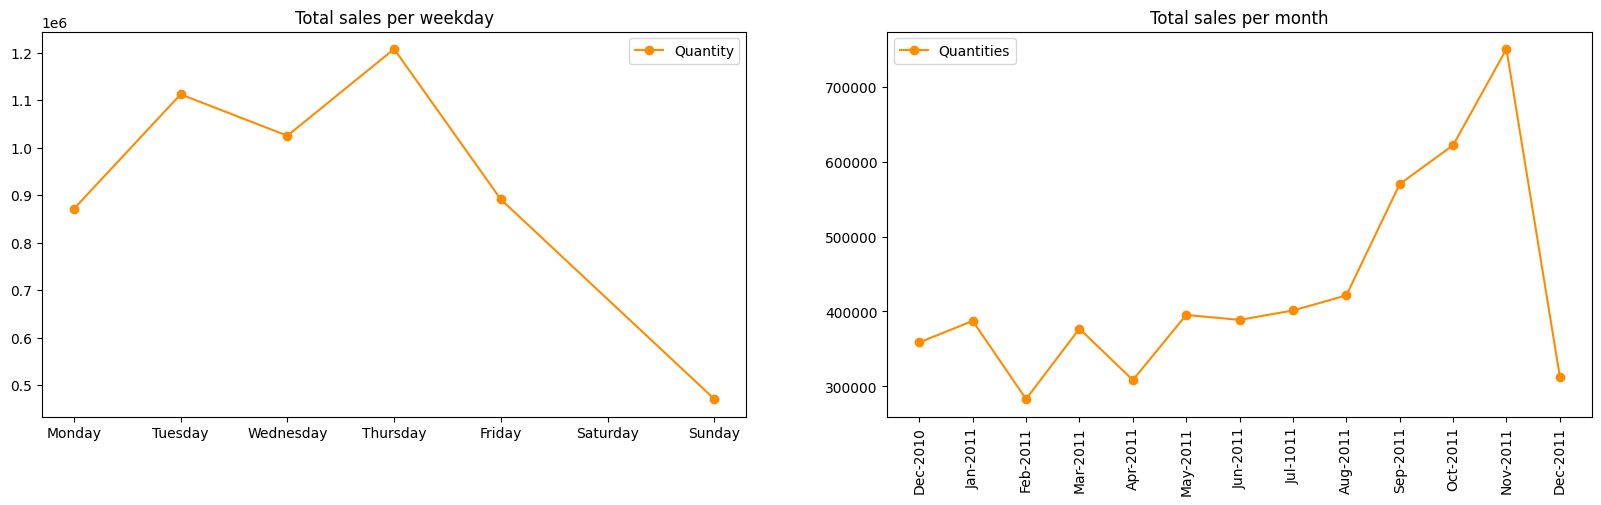

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
yearmonth = ["Dec-2010", "Jan-2011", "Feb-2011", "Mar-2011", "Apr-2011", "May-2011",
             "Jun-2011", "Jul-1011", "Aug-2011", "Sep-2011", "Oct-2011", "Nov-2011",
             "Dec-2011"]

df_daily.groupby("Weekday").Quantity.sum().plot(
    ax=ax[0], marker='o', label="Quantity", c="darkorange");
ax[0].legend();
ax[0].set_xticks(np.arange(0,7))
ax[0].set_xticklabels(weekdays);
ax[0].set_xlabel("")
ax[0].set_title("Total sales per weekday");

ax[1].plot(df_daily.groupby(["Year", "Month"]).Quantity.sum().values,
    marker='o', label="Quantities", c="darkorange");
ax[1].set_xticklabels(yearmonth, rotation=90)
ax[1].set_xticks(np.arange(0, len(yearmonth)))
ax[1].legend();
ax[1].set_title("Total sales per month");

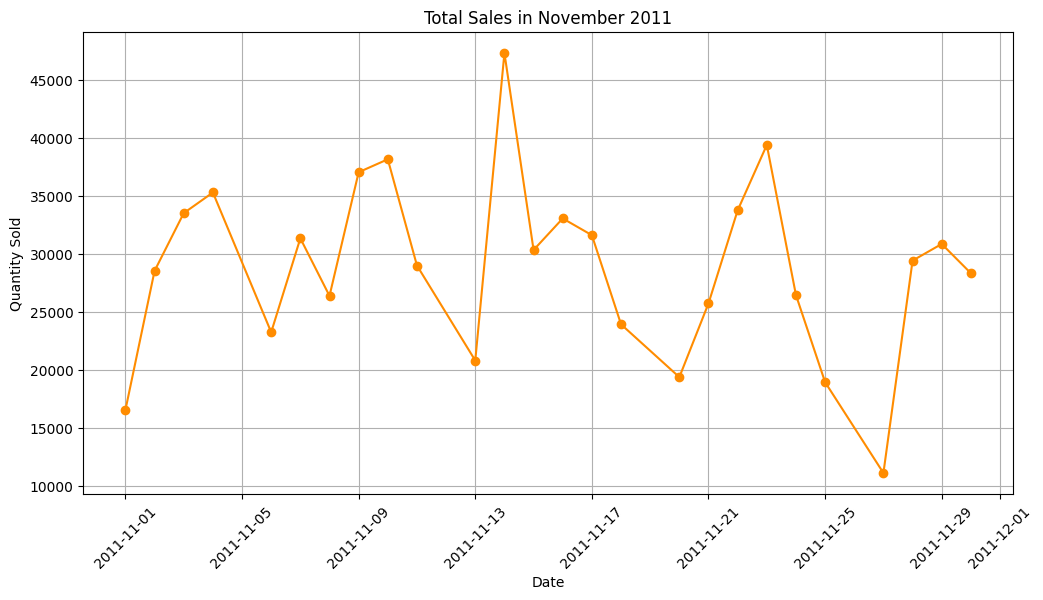

In [ ]:
## KASIM 2011 ayinda a) hangi urunler satilmis ve miktarlari ne?
# Kasım 2011 ayındaki verileri filtreleyelim
november_sales = df[(df['InvoiceDate'] >= '2011-11-01') & (df['InvoiceDate'] < '2011-12-01')]
# Günlük toplam satışları hesaplayalım
daily_november_sales = november_sales.groupby(november_sales['InvoiceDate'].dt.date).Quantity.sum()

# Görselleştirelim
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
daily_november_sales.plot(marker='o', color='darkorange')
plt.title('Total Sales in November 2011')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid()
plt.show()
## 14 kasimda 5000 adete yakin satis yapilmis 4-21 kasim arasinda kampanya yapilmis olabilir

In [ ]:
top_products3 = november_sales.groupby("Description").agg({"UnitPrice":"sum", "Quantity": "sum", "TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False).head(20)

In [ ]:
# Grafik oluşturma
fig = go.Figure(data=[
    go.Bar(x=top_products3.index,
           y=top_products3['Quantity'],
           name='Toplam Miktar Quantity',
           marker_color='blue'),
    go.Bar(x=top_products3.index,
           y=top_products3['TotalPrice'],
           name='Toplam tutar TotalPrice',
           marker_color='orange')
])

# Grafik başlığı ve etiketleri
fig.update_layout(title='2011 KASIM AYINDA En Çok Kazandiran 20 Ürün',
                  xaxis_title='en cok kazanilan 20 urun',
                  yaxis_title='Değer',
                  barmode='group',  # Çubukları gruplandır
                  template='plotly_white')

# Grafiği gösterme
fig.show()


In [ ]:
top_products4 = november_sales.groupby("Description").agg({"UnitPrice":"sum", "Quantity": "sum", "TotalPrice": "sum"}).sort_values("Quantity", ascending=False).head(20)

In [ ]:
# Grafik oluşturma
fig = go.Figure(data=[
    go.Bar(x=top_products4.index,
           y=top_products4['Quantity'],
           name='Toplam Miktar Quantity',
           marker_color='blue'),
    go.Bar(x=top_products4.index,
           y=top_products4['TotalPrice'],
           name='Toplam tutar TotalPrice',
           marker_color='orange')
])

# Grafik başlığı ve etiketleri
fig.update_layout(title='2011 Kasim Ayinda En Çok Satilan 20 Ürün',
                  xaxis_title='en cok satilan 20 urun',
                  yaxis_title='Değer',
                  barmode='group',  # Çubukları gruplandır
                  template='plotly_white')

# Grafiği gösterme
fig.show()


In [ ]:
november_sales.groupby("Description").agg({"UnitPrice":"sum", "Quantity": "sum", "TotalPrice": "sum"}).sort_values("Quantity", ascending=False).head(20)

,UnitPrice,Quantity,TotalPrice
Description,,,
RABBIT NIGHT LIGHT,1144.78,14954,34556.72
POPCORN HOLDER,254.52,12460,14195.60
PAPER CHAIN KIT 50'S CHRISTMAS,1309.74,7908,28985.04
JUMBO BAG RED RETROSPOT,592.60,5909,11641.37
WOODEN STAR CHRISTMAS SCANDINAVIAN,96.09,5366,1787.50
ASSORTED COLOUR BIRD ORNAMENT,362.32,5254,8440.94
WOODEN HEART CHRISTMAS SCANDINAVIAN,90.31,5003,1658.29
WHITE HANGING HEART T-LIGHT HOLDER,884.06,4944,14362.12
WORLD WAR 2 GLIDERS ASSTD DESIGNS,30.35,4559,1331.37


In [ ]:
# Perşembe gününe göre filtreleme yapalım
thursday_sales = df_daily[df_daily['Dayname'] == 'Thursday']
thursday_sales.groupby("Description").agg({"UnitPrice":"sum", "Quantity": "sum", "TotalPrice": "sum"}).sort_values("Quantity", ascending=False).head(20)

,UnitPrice,Quantity,TotalPrice
Description,,,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,33.22,18195,4224.37
JUMBO BAG RED RETROSPOT,989.59,11613,22091.20
ASSORTED COLOUR BIRD ORNAMENT,545.04,11440,17904.56
MINI PAINT SET VINTAGE,63.26,9348,5541.72
POPCORN HOLDER,132.18,9004,7081.36
WHITE HANGING HEART T-LIGHT HOLDER,1390.50,8310,23980.02
PACK OF 72 RETROSPOT CAKE CASES,157.95,8092,3999.96
RED HARMONICA IN BOX,182.56,7646,8479.51
PACK OF 12 LONDON TISSUES,43.80,6682,1965.88


In [ ]:
thursday_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98515 entries, 2896 to 513986
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         98515 non-null  datetime64[ns]
 1   Year         98515 non-null  int32         
 2   Quarter      98515 non-null  int32         
 3   Month        98515 non-null  int32         
 4   Week         98515 non-null  UInt32        
 5   Weekday      98515 non-null  int32         
 6   Dayofyear    98515 non-null  int32         
 7   Day          98515 non-null  int32         
 8   Dayname      98515 non-null  object        
 9   StockCode    98515 non-null  object        
 10  CustomerID   98515 non-null  float64       
 11  Description  98515 non-null  object        
 12  UnitPrice    98515 non-null  float64       
 13  Quantity     98515 non-null  int64         
 14  TotalPrice   98515 non-null  float64       
dtypes: UInt32(1), datetime64[ns](1), float64(3), int32(6),

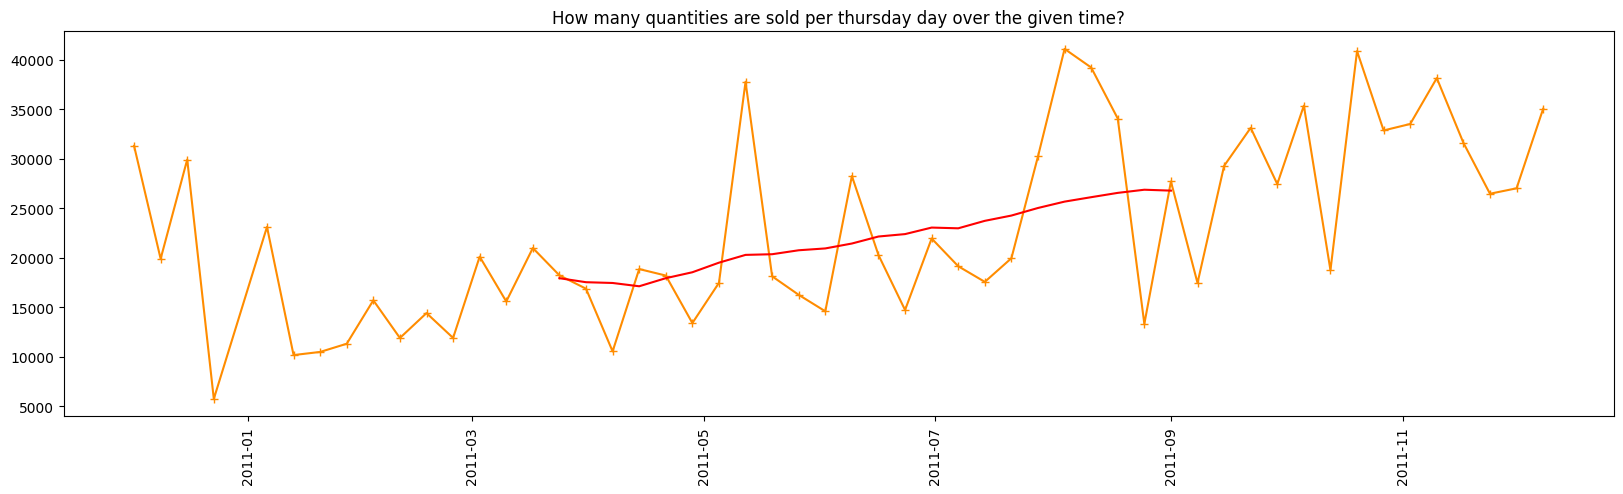

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(thursday_sales.groupby("Date").Quantity.sum(), marker='+', c="darkorange")
plt.plot(thursday_sales.groupby("Date").Quantity.sum().rolling(window=30, center=True).mean(),
        c="red")
plt.xticks(rotation=90);
plt.title("How many quantities are sold per thursday day over the given time?");

In [ ]:
top_peaks1 = thursday_sales.nlargest(4,"Quantity")
selected_columns = top_peaks1[['Date', 'Dayname','StockCode','CustomerID', 'Description', 'Quantity', 'TotalPrice']].sort_values("Quantity", ascending=False).head(20)
# Sonucu yazdırma
print(selected_columns)

             Date   Dayname StockCode  CustomerID  \
403598 2011-10-27  Thursday     84077     12901.0   
4498   2010-12-02  Thursday     84077     16754.0   
277826 2011-08-04  Thursday     84879     12931.0   
510576 2011-12-08  Thursday     22197     17949.0   

                              Description  Quantity  TotalPrice  
403598  WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800      1008.0  
4498    WORLD WAR 2 GLIDERS ASSTD DESIGNS      2880       518.4  
277826      ASSORTED COLOUR BIRD ORNAMENT      2880      4176.0  
510576                     POPCORN HOLDER      2700      1944.0  


In [ ]:
purchase = df.groupby(['Country'], as_index=False)['TotalPrice'].agg('sum')
most_purchase_countries = purchase.sort_values('TotalPrice', ascending=False).head(10)
fig = go.Figure(data=[
    go.Bar(x=most_purchase_countries['Country'].astype(str),
           y=most_purchase_countries['TotalPrice'],
           marker={'color': most_purchase_countries['TotalPrice'],
                   'colorscale': 'viridis'})])
fig.update_traces(texttemplate='£%{y:.3s}', textposition='outside')
fig.update_layout(title='Countries With Highest Total Purchase Amount',
                  title_x=0.5,
                  xaxis_title="Countries",
                  yaxis_title="Amount Sum",
                  plot_bgcolor='white')
fig.show()

In [ ]:
min_purchase_countries = purchase.sort_values('TotalPrice').head(10)
fig = go.Figure(data=[
    go.Bar(x=min_purchase_countries['Country'].astype(str),
           y=min_purchase_countries['TotalPrice'],
           marker={'color': min_purchase_countries['TotalPrice'],
                   'colorscale': 'Viridis'})])
fig.update_traces(texttemplate='£%{y:.2s}', textposition='inside')
fig.update_layout(title='Countries With Lowest Total Purchase Amount',
                  title_x=0.5,
                  xaxis_title="Countries",
                  yaxis_title="Amount Sum",
                  plot_bgcolor='white')
fig.show()

In [ ]:
products = df.pivot_table(index="Description", values="Quantity", aggfunc=np.sum).reset_index()
best_selling = products.sort_values('Quantity', ascending=False).head(15)
fig = go.Figure(data=[
    go.Bar(x=best_selling['Description'].astype(str),
           y=best_selling['Quantity'],
           marker={'color': best_selling['Quantity'],
                   'colorscale': 'viridis'})])
fig.update_traces(texttemplate='%{y:.2s}', textposition='inside')
fig.update_layout(title='15 Popular Products',
                  title_x=0.5,
                  xaxis_title="Products",
                  yaxis_title="Total Quantity",
                  plot_bgcolor='white')
fig.update_xaxes(tickangle=15)
fig.show()

<ipython-input-35-ad058d23a383>:1: FutureWarning:

The provided callable <function sum at 0x7b35f6cbf370> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



In [ ]:
customers_country_based = df.groupby(['CustomerID', 'Country'], as_index=False)['TotalPrice'].agg('sum')
best_customers = customers_country_based.sort_values('TotalPrice', ascending=False).head(10)
fig = go.Figure(data=[
    go.Bar(
           x=best_customers['CustomerID'].astype(str),
           y=best_customers['TotalPrice'],
           hovertext=best_customers['Country'],
           marker={'color': best_customers['TotalPrice'],
                   'colorscale': 'viridis'})])

fig.update_traces(texttemplate='£%{y:.2s}', textposition='inside')
fig.update_layout(title='Best Customers based on Purchase Amount',
                  title_x=0.5,
                  xaxis_title="CustomerID",
                  yaxis_title="Total Amount, £",
                  plot_bgcolor='white')
fig.show()


In [ ]:
customers_country_based = df.groupby(['CustomerID', 'Country'], as_index=False)['TotalPrice'].agg('sum')
worst_customers = customers_country_based.sort_values('TotalPrice').head(10)
fig = go.Figure(data=[
    go.Bar(x=worst_customers['CustomerID'].astype(str),
           y=worst_customers['TotalPrice'],
           hovertext=worst_customers['Country'],
           marker={'color': worst_customers['TotalPrice'],
                   'colorscale': 'viridis'})])
fig.update_traces(texttemplate='£%{y:.2s}', textposition='inside')
fig.update_layout(title='Worst Customers based on Purchase Amount',
                  title_x=0.5,
                  xaxis_title="CustomerID",
                  yaxis_title="Total Amount, £",
                  plot_bgcolor='white')
fig.show()

In [ ]:
df.groupby(['CustomerID', 'Country'], as_index=False)['TotalPrice'].agg('sum').sort_values(by='TotalPrice', ascending=True)


,CustomerID,Country,TotalPrice
107499,205981.0,United Kingdom,0.06
58457,155576.0,United Kingdom,0.19
72186,169801.0,United Kingdom,0.21
124064,222857.0,United Kingdom,0.21
53508,150448.0,United Kingdom,0.21
...,...,...,...
1887,14911.0,EIRE,136275.72
3015,16446.0,United Kingdom,168472.50
3734,17450.0,United Kingdom,194550.79
4206,18102.0,United Kingdom,259657.30


In [ ]:
df1= df[~df["CustomerID"].isin(unique_values)]
df1.groupby(['CustomerID', 'Country'], as_index=False)['TotalPrice'].agg('sum').sort_values(by='TotalPrice', ascending=True)

,CustomerID,Country,TotalPrice
3224,16738.0,United Kingdom,3.75
3021,16454.0,United Kingdom,5.90
1801,14792.0,United Kingdom,6.20
4103,17956.0,United Kingdom,12.75
3329,16878.0,United Kingdom,13.30
...,...,...,...
1887,14911.0,EIRE,136275.72
3015,16446.0,United Kingdom,168472.50
3734,17450.0,United Kingdom,194550.79
4206,18102.0,United Kingdom,259657.30


In [ ]:
df.groupby(['CustomerID', 'Country'], as_index=False)['TotalPrice'].agg('sum').sort_values(by='TotalPrice', ascending=True)

,CustomerID,Country,TotalPrice
107499,205981.0,United Kingdom,0.06
58457,155576.0,United Kingdom,0.19
72186,169801.0,United Kingdom,0.21
124064,222857.0,United Kingdom,0.21
53508,150448.0,United Kingdom,0.21
...,...,...,...
1887,14911.0,EIRE,136275.72
3015,16446.0,United Kingdom,168472.50
3734,17450.0,United Kingdom,194550.79
4206,18102.0,United Kingdom,259657.30


In [ ]:
df.groupby(['CustomerID', 'Country'], as_index=False)['TotalPrice'].agg('sum')

,CustomerID,Country,TotalPrice
0,12346.0,United Kingdom,77183.60
1,12347.0,Iceland,4310.00
2,12348.0,Finland,1437.24
3,12349.0,Italy,1457.55
4,12350.0,Norway,294.40
...,...,...,...
135792,234691.0,United Kingdom,13.16
135793,234692.0,United Kingdom,20.65
135794,234693.0,United Kingdom,16.52
135795,234694.0,United Kingdom,4.96


In [ ]:
df1.groupby(['CustomerID', 'Country'], as_index=False)['TotalPrice'].agg('sum')

,CustomerID,Country,TotalPrice
0,12346.0,United Kingdom,77183.60
1,12347.0,Iceland,4310.00
2,12348.0,Finland,1437.24
3,12349.0,Italy,1457.55
4,12350.0,Norway,294.40
...,...,...,...
4338,18280.0,United Kingdom,180.60
4339,18281.0,United Kingdom,80.82
4340,18282.0,United Kingdom,178.05
4341,18283.0,United Kingdom,2088.93


In [ ]:
count = len(df[df["CustomerID"] >= 100000])
print(count)

131454


In [ ]:
count = len(df1[df1["CustomerID"] >= 100000])
print(count)

0


In [ ]:
customers_country_based1 = df1.groupby(['CustomerID', 'Country'], as_index=False)['TotalPrice'].agg('sum')
best_customers1 = customers_country_based1.sort_values('TotalPrice', ascending=False).head(10)
fig = go.Figure(data=[
    go.Bar(
           x=best_customers1['CustomerID'].astype(str),
           y=best_customers1['TotalPrice'],
           hovertext=best_customers1['Country'],
           marker={'color': best_customers1['TotalPrice'],
                   'colorscale': 'viridis'})])

fig.update_traces(texttemplate='£%{y:.2s}', textposition='inside')
fig.update_layout(title='Best Customers based on Purchase Amount',
                  title_x=0.5,
                  xaxis_title="CustomerID",
                  yaxis_title="Total Amount, £",
                  plot_bgcolor='white')
fig.show()

In [ ]:
customers_country_based1 = df1.groupby(['CustomerID', 'Country'], as_index=False)['TotalPrice'].agg('sum')
worst_customers1 = customers_country_based1.sort_values('TotalPrice').head(10)
fig = go.Figure(data=[
    go.Bar(x=worst_customers1['CustomerID'].astype(str),
           y=worst_customers1['TotalPrice'],
           hovertext=worst_customers1['Country'],
           marker={'color': worst_customers1['TotalPrice'],
                   'colorscale': 'viridis'})])
fig.update_traces(texttemplate='£%{y:.2s}', textposition='inside')
fig.update_layout(title='Worst Customers based on Purchase Amount',
                  title_x=0.5,
                  xaxis_title="CustomerID",
                  yaxis_title="Total Amount, £",
                  plot_bgcolor='white')
fig.show()

In [ ]:
print(df["InvoiceDate"].min())
print(df["InvoiceDate"].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [ ]:
import datetime as dt
today_date=dt.datetime(2011,12,10)

rfm = df1.groupby("CustomerID").agg({"InvoiceDate": lambda date:(today_date-date.max()).days,
                              "InvoiceNo": lambda InvoiceNo:InvoiceNo.nunique(),
                              "TotalPrice":lambda TotalPrice:TotalPrice.sum()
                                  })
rfm.columns=["Recency","Frequency","Monetary"]

In [ ]:
rfm = rfm[rfm["Monetary"] >0]

In [ ]:
rfm["recency_score"]=pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])
rfm["monetary_score"]=pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])
rfm["frequency_score"]=pd.qcut(rfm["Frequency"].rank(method="first"),5,labels=[1,2,3,4,5])
rfm["RFM_SCORE"]=(rfm["recency_score"].astype(str)+rfm["frequency_score"].astype(str))

In [ ]:
rfm.head()

,Recency,Frequency,Monetary,recency_score,monetary_score,frequency_score,RFM_SCORE
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,5,1,11
12347.0,2,7,4310.00,5,5,5,55
12348.0,75,4,1437.24,2,4,4,24
12349.0,18,1,1457.55,4,4,1,41
12350.0,310,1,294.40,1,2,1,11


In [ ]:
seg_map={
    r'[1-2][1-2]':'hibernating',
    r'[1-2][3-4]':'at_risk',
    r'[1-2]5':'cant_loose',
    r'3[1-2]':'about_to_sleep',
    r'33':'need_attention',
    r'[3-4][4-5]':'loyal_customers',
    r'41':'promising',
    r'51':'new_customers',
    r'[4-5][2-3]':'potential_loyalists',
    r'5[4-5]':'champions'
    }
rfm["Segment"] = rfm["RFM_SCORE"].replace(seg_map,regex=True)


In [ ]:
rfm.head()

,Recency,Frequency,Monetary,recency_score,monetary_score,frequency_score,RFM_SCORE,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,5,1,11,hibernating
12347.0,2,7,4310.00,5,5,5,55,champions
12348.0,75,4,1437.24,2,4,4,24,at_risk
12349.0,18,1,1457.55,4,4,1,41,promising
12350.0,310,1,294.40,1,2,1,11,hibernating


In [ ]:
rfm["Segment"].value_counts()

,count
Segment,
hibernating,1074
loyal_customers,818
champions,634
at_risk,588
potential_loyalists,484
about_to_sleep,348
need_attention,189
promising,95
cant_loose,63


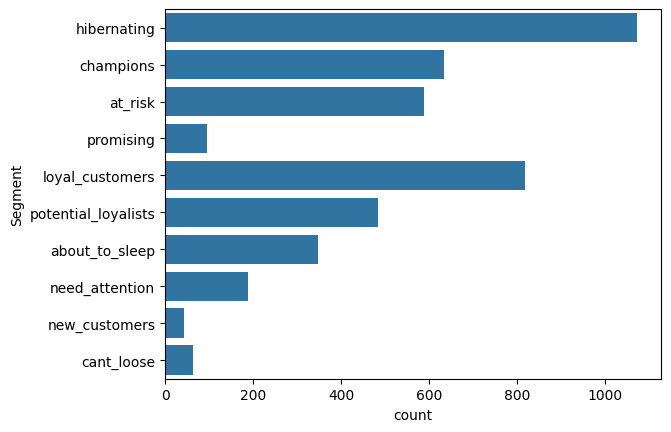

In [ ]:
sns.countplot(y ='Segment', data = rfm)

# Show the plot

plt.show()

In [ ]:
rfm["Segment"].value_counts()/rfm.shape[0]

,count
Segment,
hibernating,0.247751
loyal_customers,0.188697
champions,0.146251
at_risk,0.135640
potential_loyalists,0.111649
about_to_sleep,0.080277
need_attention,0.043599
promising,0.021915
cant_loose,0.014533


In [ ]:
print(rfm.columns)

Index(['Recency', 'Frequency', 'Monetary', 'Segment', 'recency_score',
       'monetary_score', 'frequency_score', 'RFM_SCORE'],
      dtype='object')


<ipython-input-115-3e5c7e5cf0f3>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



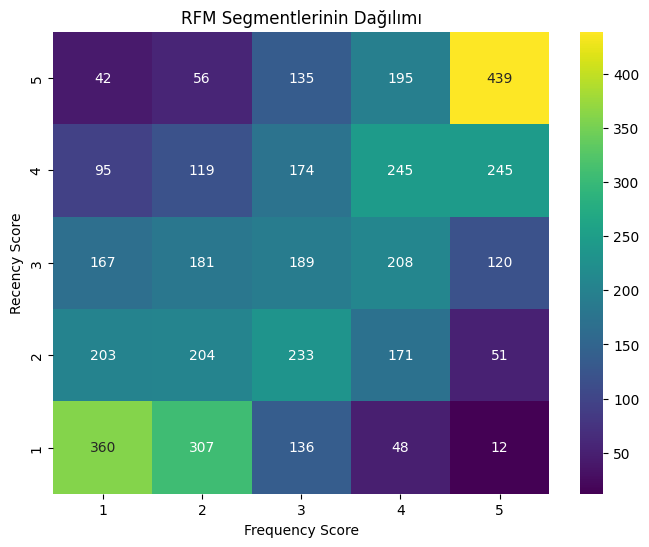

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# RFM skorlarına göre segmentlerin dağılımını gösteren bir heatmap oluşturalım.
rfm_heatmap = rfm.groupby(['recency_score', 'frequency_score'])['RFM_SCORE'].count().unstack()
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_heatmap, annot=True, fmt='g', cmap='viridis')
plt.xlabel("Frequency Score")
plt.ylabel("Recency Score")
plt.title("RFM Segmentlerinin Dağılımı")
plt.show()

In [ ]:
#Recency Score-Frequency:Score-Segment
#[1-2]-[1-2]':'kış uykusunda/hibernating',
#'[1-2]-[3-4]':'tehlikede/at_risk',
#'[1-2]-5':'gevşeyemiyorum/cant_loose',
#'3-[1-2]':'uyumak_üzere/about_to_sleep'',
#'3-3':'dikkat_gerekiyor/need_attention',
#'[3-4]-[4-5]':'sadık_müşteriler/loyal_customers',
#'4-1':'umut_verici/promising',
#'5-1':'yeni_müşteriler/new_customers',
#'[4-5]-[2-3]':'potansiyel_sadıklar/potential_loyalists',
#'5[4-5]':'şampiyonlar/champions''

In [ ]:
rfm.shape[0]

4335

In [ ]:
returned_invoices=pd.read_csv("data.csv", encoding='ISO-8859-1')



In [ ]:
returned_invoices.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
returned_invoices=returned_invoices[~(returned_invoices["InvoiceNo"].str.contains("C",na=False))]


In [ ]:
returned_invoices= returned_invoices[returned_invoices['InvoiceNo'].str.contains('C', na=False)]['InvoiceNo'].str.replace('C', '')

In [ ]:
returned_invoices.head()

,InvoiceNo


In [ ]:
returned_invoices1 = returned_invoices[returned_invoices['InvoiceNo'].str.contains('C', na=False)]['InvoiceNo'].str.replace('C', '') ## iade edilmis urunlerin alim fisleri kodlari listelendi
returned_invoices=returned_invoices[returned_invoices['InvoiceNo'].isin(returned_invoices1)] ## returned_invoices atanmis faturaralar filtrelendi